# Projekt Elektrostatik
Autoren: Albertin, Schegg

## Aufgabe 1:

### Aufgabe a):

In [18]:
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import pandas as pd

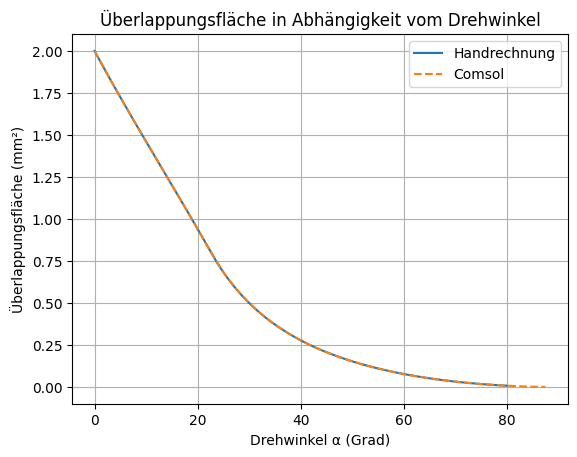

In [19]:
# Geometrie der festen Platte
feste_platte = Polygon([(0, 0), (2, 0), (2, 1), (0, 1)])


# Funktion zur Berechnung der Drehung
def rotiere_platte(alpha, drehachse=(-0.5, 0.5)):
    # Ecken der Platte relativ zur Drehachse
    ecken = np.array([[0.5, -0.5], [2.5, -0.5], [2.5, 0.5], [0.5, 0.5]])
    alpha_rad = np.radians(alpha)

    # Rotationsmatrix
    R = np.array(
        [
            [np.cos(alpha_rad), -np.sin(alpha_rad)],
            [np.sin(alpha_rad), np.cos(alpha_rad)],
        ]
    )

    # Drehung der Ecken
    ecken_rotiert = np.dot(ecken, R.T) + drehachse
    return Polygon(ecken_rotiert)


# Winkelbereich definieren
winkel_alpha = np.linspace(0, 80, 1000)
ueberlappungsflaechen = []

# Überlappungsflächen berechnen
for alpha in winkel_alpha:
    dreh_platte = rotiere_platte(alpha)
    schnitt = feste_platte.intersection(dreh_platte)
    ueberlappungsflaechen.append(schnitt.area)

Ac = pd.read_csv("./Daten/Flächenvergleich.csv")

# Ergebnisse plotten
plt.plot(winkel_alpha, ueberlappungsflaechen, label="Handrechnung")
plt.plot(Ac["alpha (deg)"], 10**6*Ac["1 (m^2)"], linestyle= "--",label= "Comsol")
plt.xlabel("Drehwinkel α (Grad)")
plt.ylabel("Überlappungsfläche (mm²)")
plt.title("Überlappungsfläche in Abhängigkeit vom Drehwinkel")
plt.grid()
plt.legend()

Die Handrechnung sowie die Rechnung mit Comsol ergeben das gleiche Resultat für die Überlappungsfläche.

Der Grundbaustein der Geometrie sieht aus wie in der Abbildung unten links. Er wurde aus zwei Rechtecken und einem Rotationselement erstellt. Für die Bestimmung der Überlagerungsfläche wurde noch ein intersektions Element hinzugefügt, dies kann in der Abbildung unten rechts für $\alpha = 30\text{°}$ betrachtet werden. Es wurden 36 Winkel zwischen 0° und 87.5° verwendet durch einen  _Parametric Sweep_ wurde die Überlagerungsfläche für jeden Winkel bestimmt und nachher mittels _Derived Values_ $\rarr$ _Surface Integration_ eine Tabelle der Werte erstellt die nacher exportiert werden konnte. (Es wurde nur die Aufgabe 1a mit Comsol zur Kontrolle gelöst, da die Aufgabe 1b nur eine Umformung ist muss sie nicht zusätzlich überprüft werden.)

<img src="./Bilder/Geometrie2.png" alt="Hallo" width="400" height="300"> <img src="./Bilder/Intersektion.png" alt="Alternativtext" width="400" height="300">


### Aufgabe b):

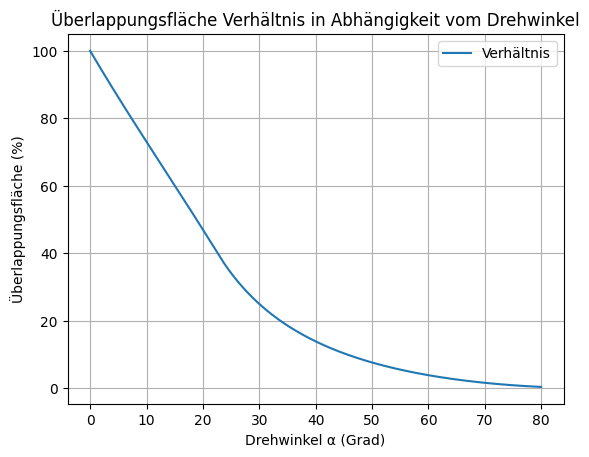

In [20]:
# Ergebnisse plotten aufgabe b)
A = 2  # Fläche in (mm²)

ueberlappungsflaechenb = [100 * element / A for element in ueberlappungsflaechen]
plt.plot(winkel_alpha, ueberlappungsflaechenb, label="Verhältnis")
plt.xlabel("Drehwinkel α (Grad)")
plt.ylabel("Überlappungsfläche (%)")
plt.title("Überlappungsfläche Verhältnis in Abhängigkeit vom Drehwinkel")
plt.grid()
plt.legend()

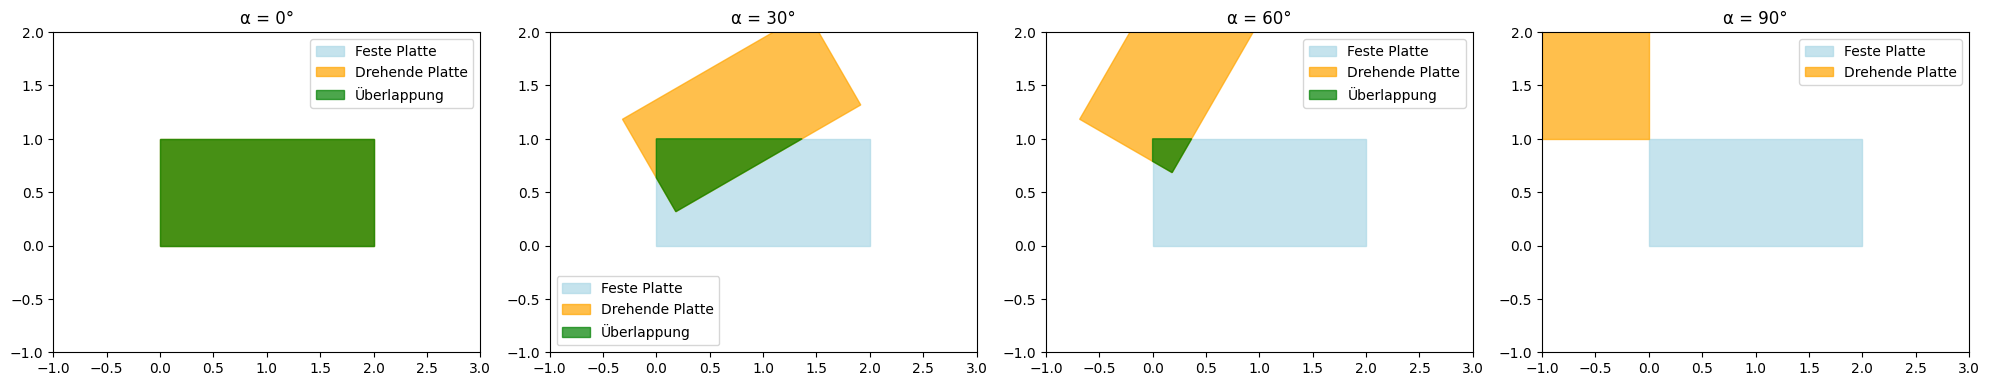

In [21]:
# Plot der Platten für ausgewählte Winkel
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
angles_to_plot = [0, 30, 60, 90]

for ax, angle in zip(axes, angles_to_plot):
    dreh_platte = rotiere_platte(angle)

    # Feste Platte plotten
    x, y = feste_platte.exterior.xy
    ax.fill(x, y, color="lightblue", alpha=0.7, label="Feste Platte")

    # Drehende Platte plotten
    x, y = dreh_platte.exterior.xy
    ax.fill(x, y, color="orange", alpha=0.7, label="Drehende Platte")

    # Überlappung plotten
    schnitt = feste_platte.intersection(dreh_platte)

    # exterior funktioniert nicht für Punkte
    if not schnitt.is_empty and angle != 90:
        x, y = schnitt.exterior.xy
        ax.fill(x, y, color="green", alpha=0.7, label="Überlappung")

    ax.set_xlim(-1, 3)
    ax.set_ylim(-1, 2)
    ax.set_aspect("equal")
    ax.set_title(f"α = {angle}°")
    ax.legend()

plt.tight_layout()

## Aufgabe 3): 

### Handrechnung der Aufgabe 3:

Kapazität:
$$ C(\alpha) = \epsilon_0 \cdot \frac{A(\alpha)}{d} $$

In [22]:
eps0 = 8.854 * 10 ** (-12)  # elektr. Feldkonstante [F/m]
d = 10 ** (-5)  # Abstand [m]
Q = 1.856 * 10 ** (-11)  # Ladung in [C]

In [23]:
A = [
    element / 10**6 for element in ueberlappungsflaechen
]  # Fläche des Kondensator in [m^2]
A = np.array([A])

Text(0.5, 1.0, 'Kapazität zu Winkel')

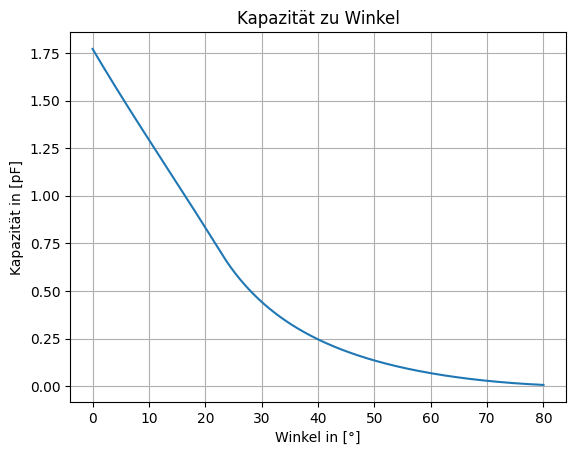

In [24]:
C = eps0 * A / d  # Kapazität in [F]
alpha = np.array([winkel_alpha])  # Winkel in [°]

plt.plot(alpha[0, :], 10**12 * C[0, :])
plt.grid()
plt.ylabel("Kapazität in [pF]")
plt.xlabel("Winkel in [°]")
plt.title("Kapazität zu Winkel")

$$ W(\alpha) = \frac{Q^2}{2 \cdot C(\alpha)} $$
$$ w_e = \frac{W}{A \cdot d}$$

In [25]:
C = np.where(C == 0, 10 ** (-14), C)
A = np.where(A == 0, 10 ** (-14), A)

In [26]:
Wc = pd.read_csv("./Daten/Energie.csv") #Energie mit Comsol berechnet

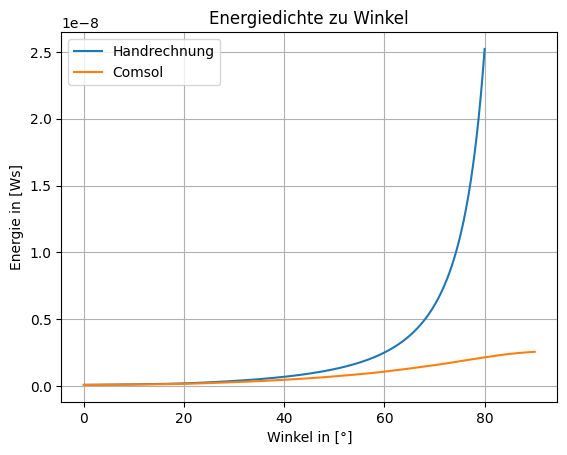

In [27]:
W = 1 / 2 * Q**2 / C  # Energie in [Ws]
we = W / (A * d)  # Energiedichte in [W/m^3]
plt.plot(alpha[0, :], W[0, :], label = "Handrechnung")
plt.plot(-Wc["alpha (deg)"],Wc["Total electric energy (J)"], label = "Comsol")
plt.grid()
plt.ylabel("Energie in [Ws]")
plt.xlabel("Winkel in [°]")
plt.title("Energiedichte zu Winkel")
plt.legend()

Drehmoment:
$$ M(\alpha) = \frac{d W(\alpha)}{d \alpha} $$ 
$$ M \approx  \frac{\Delta W}{\Delta \alpha} $$

In [28]:
M = []
for i in range(W.shape[1] - 1):  # Spaltenanzahl minus 1
    delta_W = W[0, i + 1] - W[0, i]
    delta_alpha = alpha[0, i + 1] - alpha[0, i]
    M.append(delta_W / delta_alpha)

In [29]:
Mc = pd.read_csv("./Daten/Drehmoment.csv") # Drehmoment mit Comsol berechnet

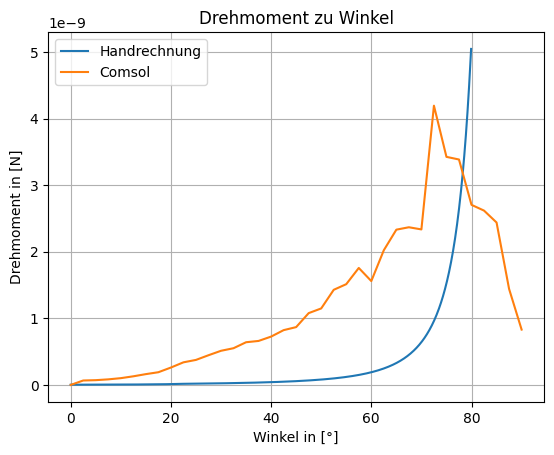

In [30]:
alphapop = alpha[0, :-1]
plt.plot(alphapop, M, label= "Handrechnung")
plt.plot(-Mc["alpha (deg)"], Mc["Axial torque (N*m)"], label = "Comsol")
plt.grid()
plt.ylabel("Drehmoment in [N]")
plt.xlabel("Winkel in [°]")
plt.title("Drehmoment zu Winkel")
plt.legend()

Potenzial:
$$ V(\alpha) = \frac{Q}{C(\alpha)} $$

In [31]:
Phic = pd.read_csv("./Daten/Potenzial.csv") # Potenzial mit Comsol berechnet

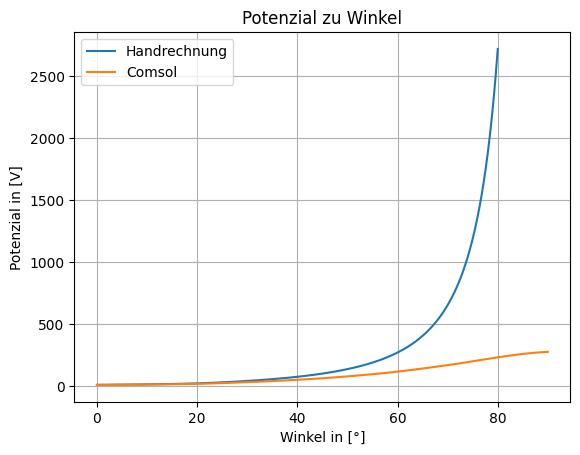

In [32]:
Phi = Q / C
plt.plot(alpha[0, :], Phi[0, :], label = "Handrechnung")
plt.plot(-Phic["alpha (deg)"], Phic["Electric potential (V), Potential bewegliche Platte"], label= "Comsol")
plt.grid()
plt.ylabel("Potenzial in [V]")
plt.xlabel("Winkel in [°]")
plt.title("Potenzial zu Winkel")
plt.legend()